
# <span style="color:#0e6655;">Ứng dụng Cây quyết định phân loại ý định mua sắm của khách hàng</span>
---
---

## Import Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, log_loss, confusion_matrix
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree
import graphviz

from sklearn.neural_network import MLPRegressor, MLPClassifier


In [52]:
# pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 330.3 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 472.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Xử lý dữ liệu

> Kiểm tra thông tin dữ liệu

In [5]:
df.shape

(12330, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
for col in df.columns:
    print(df[col].value_counts())

Administrative
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: count, dtype: int64
Administrative_Duration
0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: count, Length: 3335, dtype: int64
Informational
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: count, dtype: int64
Informational_Duration
0.00      9925
9.00        33
7.00        26
10.00       26
6.00        26
          ... 
246.80       1
274.00       1
13.40        1
223.

In [8]:
for i in df.select_dtypes(include='object').columns:
    print(i)
    print(df[i].unique())
    print()

Month
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']

VisitorType
['Returning_Visitor' 'New_Visitor' 'Other']



In [9]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

> -> Dữ liệu không có giá trị rỗng

> Kiểm tra biến mục tiêu bằng cách trực quan biểu đồ 

In [10]:
# Kiểm tra biến mục tiêu
df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

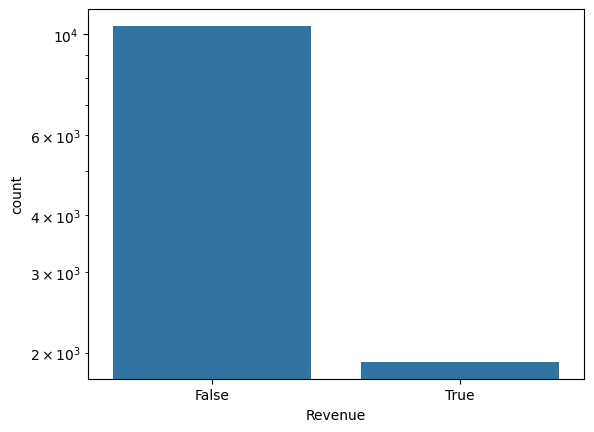

In [11]:
ax = sns.countplot(x='Revenue', data=df);
ax.set_yscale('log')

> Loại bỏ các giá trị không có ích.
> 
> Kiểm tra nhận thấy các giá trị như Administrative, Informational, ProductRelated_Duration không có hữu ích trong việc phân tích nên có thể loại bỏ được. Vì chúng biểu thị số trang được người dùng truy cập trong mỗi danh mục này và tổng số trang đã truy cập đã được ghi lại bởi cột 'PageValues'. Vì vậy, những cột này được coi là dư thừa và không hữu ích cho việc phân tích.

In [12]:
df['Administrative'].unique()

array([ 0,  1,  2,  4, 12,  3, 10,  6,  5,  9,  8, 16, 13, 11,  7, 18, 14,
       17, 19, 15, 24, 22, 21, 20, 23, 27, 26], dtype=int64)

In [13]:
df['Informational'].unique()

array([ 0,  1,  2,  4, 16,  5,  3, 14,  6, 12,  7,  9, 10,  8, 11, 24, 13],
      dtype=int64)

In [14]:
df['ProductRelated_Duration'].unique()

array([  0.        ,  64.        ,   2.66666667, ..., 465.75      ,
       184.25      , 346.        ])

In [15]:
df = df.drop(['Administrative', 'Informational', 'ProductRelated_Duration'], axis = 1)

In [16]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,2,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,2,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,10,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


> Chuẩn hóa biến VisitorType về dạng giá trị số

In [25]:
df['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

In [26]:
visitor = pd.get_dummies(df['VisitorType'])
X = pd.concat([df, visitor], axis=1)

## Thực hiện tập Train và Test

In [27]:
X = X.drop(['Revenue', 'Month', 'VisitorType'], axis = 1).copy()
y = df['Revenue'].copy()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

In [29]:
X_train.shape, X_test.shape

((9864, 15), (2466, 15))

In [30]:
y_train

4263     False
5905     False
9434     False
3505      True
2067      True
         ...  
2419      True
1200     False
2398     False
11106    False
11430     True
Name: Revenue, Length: 9864, dtype: bool

## Decision Tree Classifier model

In [31]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.92      0.92      2084
        True       0.54      0.54      0.54       382

    accuracy                           0.86      2466
   macro avg       0.73      0.73      0.73      2466
weighted avg       0.86      0.86      0.86      2466



**Đánh giá :**

-----

In [33]:
print('AUC = ', roc_auc_score(y_test, y_pred))
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('F1-score = ', f1_score(y_test, y_pred))
print('LogLoss = ', log_loss(y_test, y_pred))

AUC =  0.727646943553979
Accuracy =  0.8576642335766423
F1-score =  0.5399737876802096
LogLoss =  5.130301029837843


**Ma trận hỗn loạn**

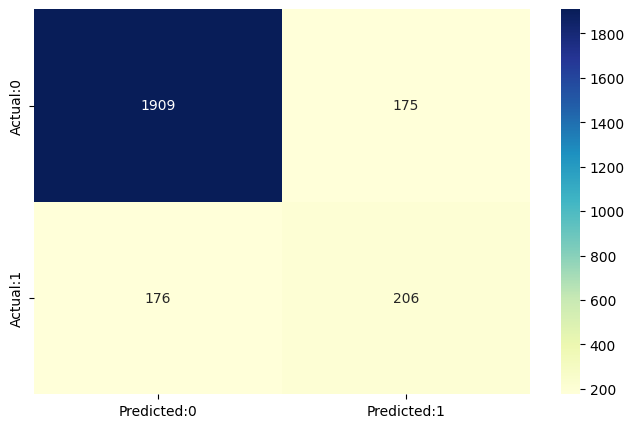

In [34]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu");

> Tính toán thô và in ra các chỉ số đánh giá hiệu quả của mô hình phân loại, dựa trên ma trận nhầm lẫn

> Ta có các công thức

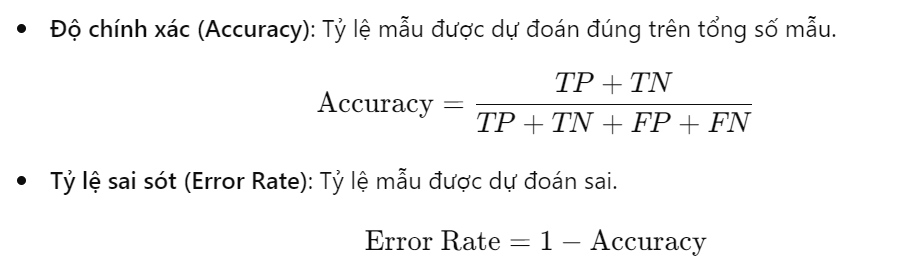

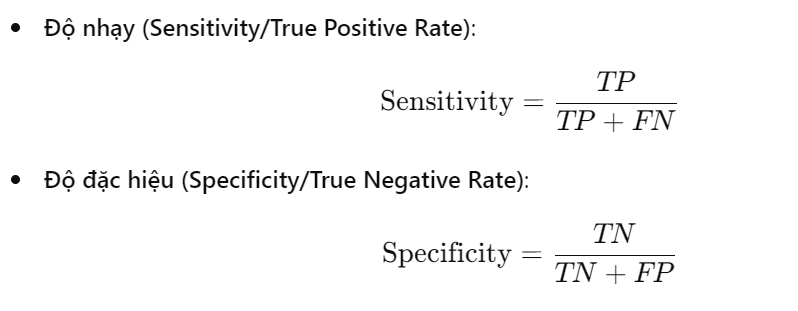

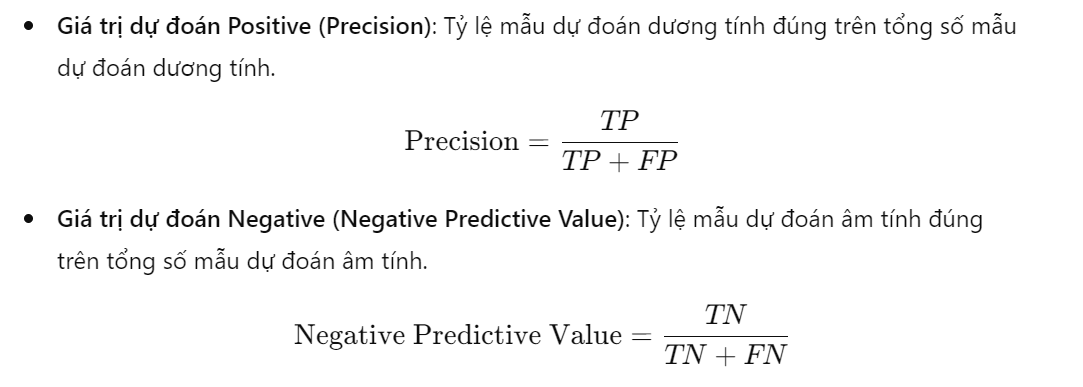

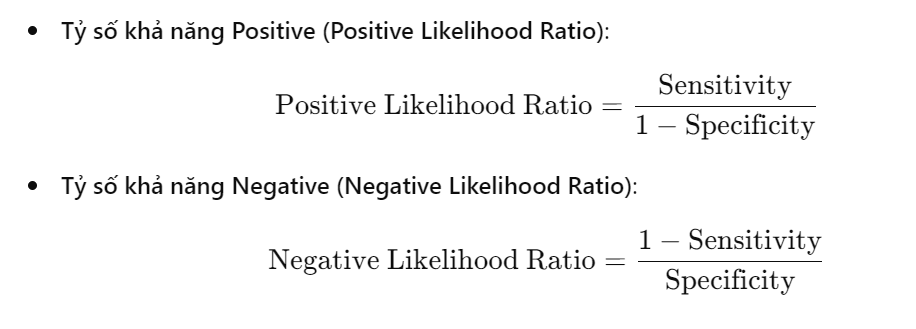

In [35]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)

In [36]:
print('Độ chính xác của mô hình = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'Tỷ lệ sai sót = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Độ nhạy/tỷ lệ True Positive = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Độ đặc hiệu/tỷ lệ True Negative = TN/(TN+FP) =       ',TN/float(TN+FP),'\n',

'Giá trị dự đoán Positive = TP/(TP+FP) =               ',TP/float(TP+FP),'\n',

'Giá trị dự đoán Negative = TN/(TN+FN) =               ',TN/float(TN+FN),'\n',

'Tỷ số khả năng Positive = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Tỷ số khả năng Negative = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

Độ chính xác của mô hình = TP+TN/(TP+TN+FP+FN) =        0.8576642335766423 
 Tỷ lệ sai sót = 1-Accuracy =                   0.14233576642335766 
 Độ nhạy/tỷ lệ True Positive = TP/(TP+FN) =        0.5392670157068062 
 Độ đặc hiệu/tỷ lệ True Negative = TN/(TN+FP) =        0.9160268714011516 
 Giá trị dự đoán Positive = TP/(TP+FP) =                0.5406824146981627 
 Giá trị dự đoán Negative = TN/(TN+FN) =                0.9155875299760192 
 Tỷ số khả năng Positive = Sensitivity/(1-Specificity) =  6.421899775617049 
 Tỷ số khả năng Negative = (1-Sensitivity)/Specificity =  0.502968852418552


**Đánh giá:**

---

> Thực hiện dự đoán xác suất của các lớp cho các mẫu trong tập kiểm tra X_test bằng mô hình đã huấn luyện

In [38]:
y_pred_prob = model.predict_proba(X_test)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of Not Fraud (0)', 'Prob of Fraud (1)'])
y_pred_prob_df.head()

,Prob of Not Fraud (0),Prob of Fraud (1)
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


> Lặp qua các ngưỡng từ 0 đến 1 (tăng dần 0.1 mỗi bước) để xác định ma trận nhầm lẫn (confusion matrix) và các chỉ số đánh giá hiệu suất của mô hình phân loại cho mỗi ngưỡng

In [39]:
for i in range(0, 11):
    cm2 = 0
    threshold = i/10
    y_pred_prob_yes = model.predict_proba(X_test)
    y_pred2 = binarize(y_pred_prob_yes, threshold=threshold)[:, 1]
    cm2 = confusion_matrix(y_test, y_pred2)
    print('With', threshold, 'threshold the Confusion Matrix is', '\n', cm2, '\n',
          'with', cm2[0, 0] + cm2[1, 1], 'correct predictions and', cm2[1, 0], 'Type II errors (False Negatives)', '\n\n',
          'Sensitivity:', cm2[1, 1]/(float(cm2[1, 1] + cm2[1, 0])),
          'Specificity:', cm2[0, 0]/(float(cm2[0, 0] + cm2[0, 1])), '\n\n\n')

With 0.0 threshold the Confusion Matrix is 
 [[1909  175]
 [ 176  206]] 
 with 2115 correct predictions and 176 Type II errors (False Negatives) 

 Sensitivity: 0.5392670157068062 Specificity: 0.9160268714011516 



With 0.1 threshold the Confusion Matrix is 
 [[1909  175]
 [ 176  206]] 
 with 2115 correct predictions and 176 Type II errors (False Negatives) 

 Sensitivity: 0.5392670157068062 Specificity: 0.9160268714011516 



With 0.2 threshold the Confusion Matrix is 
 [[1909  175]
 [ 176  206]] 
 with 2115 correct predictions and 176 Type II errors (False Negatives) 

 Sensitivity: 0.5392670157068062 Specificity: 0.9160268714011516 



With 0.3 threshold the Confusion Matrix is 
 [[1909  175]
 [ 176  206]] 
 with 2115 correct predictions and 176 Type II errors (False Negatives) 

 Sensitivity: 0.5392670157068062 Specificity: 0.9160268714011516 



With 0.4 threshold the Confusion Matrix is 
 [[1909  175]
 [ 176  206]] 
 with 2115 correct predictions and 176 Type II errors (False Ne

**Đánh giá:**
> Ma trận nhầm lẫn và các chỉ số đánh giá không thay đổi khi ngưỡng thay đổi từ 0.0 đến 0.9, ngoại trừ ngưỡng 1.0

> Vẽ đường cong ROC (Receiver Operating Characteristic) cho mô hình phân loại "Fraud classifier". Đường cong ROC thể hiện mối quan hệ giữa tỷ lệ dương tính giả (False Positive Rate - FPR) và tỷ lệ dương tính thật (True Positive Rate - TPR) khi thay đổi ngưỡng phân loại. 

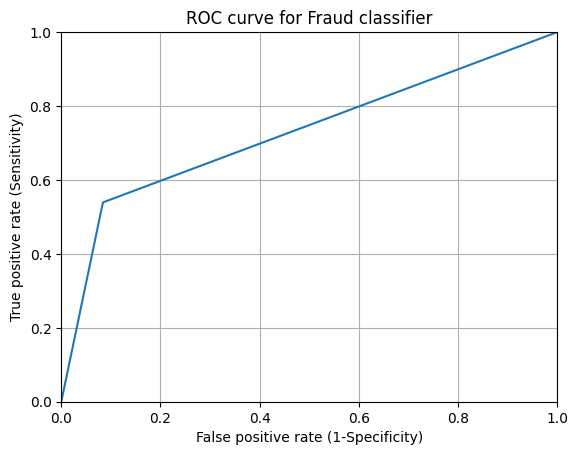

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

**Đánh giá đồ thị:**

In [41]:
roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.727646943553979

> Có thể thấy rằng mô hình có khả năng phân biệt tương đối tốt giữa hai lớp "Fraud" (gian lận) và "Not Fraud" (không gian lận)

## Cải thiện mô hình

> Sử dụng GridSearchCV để tìm kiếm các siêu tham số tốt nhất cho mô hình Decision Tree Classifier

In [42]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [43]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, max_features='sqrt',
                       random_state=42)

> Áp dụng siêu tham số vừa tìm được vào mô hình

In [46]:
model_best = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, max_features='sqrt', random_state=42)
model_best.fit(X_train, y_train)
y_pred = model_best.predict(X_test)

In [47]:
print('AUC = ', roc_auc_score(y_test, y_pred))
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('F1-score = ', f1_score(y_test, y_pred))
print('LogLoss = ', log_loss(y_test, y_pred))

AUC =  0.6949194058948256
Accuracy =  0.8872668288726683
F1-score =  0.5335570469798657
LogLoss =  4.063315345569573


**Đánh giá:**
> Null

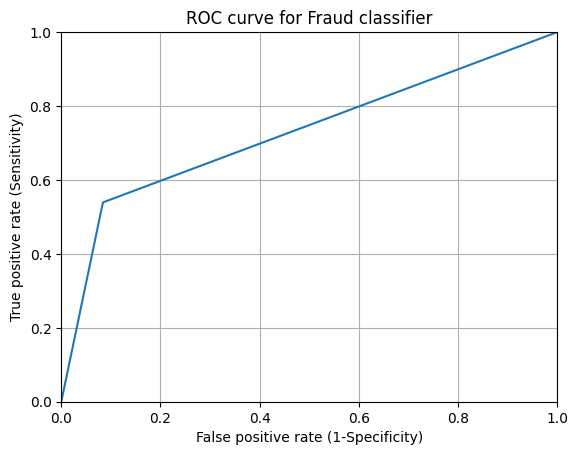

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

**Đánh giá đồ thị:**

**Visualization với Cây quyết định**

[Text(0.4, 0.9285714285714286, 'x[0] <= 14.1\ngini = 0.262\nsamples = 9864\nvalue = [8338, 1526]'),
 Text(0.2, 0.7857142857142857, 'x[5] <= 0.672\ngini = 0.172\nsamples = 5154\nvalue = [4665, 489]'),
 Text(0.1, 0.6428571428571429, 'gini = 0.047\nsamples = 4655\nvalue = [4542, 113]'),
 Text(0.3, 0.6428571428571429, 'x[12] <= 0.5\ngini = 0.371\nsamples = 499\nvalue = [123, 376]'),
 Text(0.2, 0.5, 'x[4] <= 0.014\ngini = 0.437\nsamples = 379\nvalue = [122, 257]'),
 Text(0.1, 0.35714285714285715, 'gini = 0.259\nsamples = 131\nvalue = [20, 111]'),
 Text(0.3, 0.35714285714285715, 'gini = 0.484\nsamples = 248\nvalue = [102, 146]'),
 Text(0.4, 0.5, 'gini = 0.017\nsamples = 120\nvalue = [1, 119]'),
 Text(0.6, 0.7857142857142857, 'x[5] <= 1.48\ngini = 0.343\nsamples = 4710\nvalue = [3673, 1037]'),
 Text(0.5, 0.6428571428571429, 'gini = 0.117\nsamples = 3101\nvalue = [2908, 193]'),
 Text(0.7, 0.6428571428571429, 'x[4] <= 0.025\ngini = 0.499\nsamples = 1609\nvalue = [765, 844]'),
 Text(0.6, 0.5, 'x

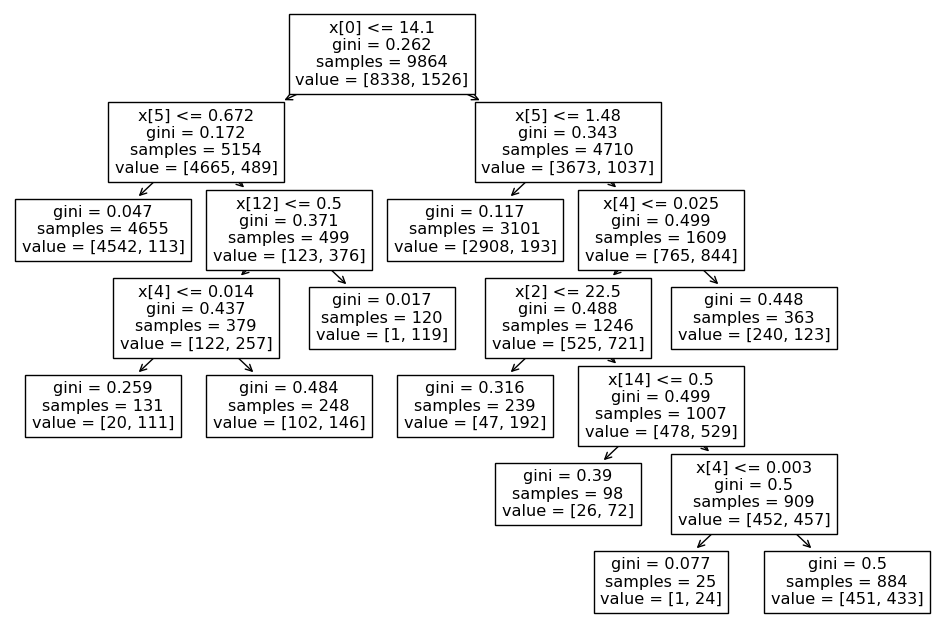

In [50]:
plt.figure(figsize=(12,8))

tree.plot_tree(model_best.fit(X_train, y_train))

In [56]:
# dot_data = tree.export_graphviz(model_best, out_file=None, feature_names=X_train.columns, class_names= None, filled=True, rounded=True, special_characters=True)

# graph = graphviz.Source(dot_data)

# graph

**Đánh giá mô hình**

## Cải thiện mô hình thông qua Random Forest model

In [58]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2084
        True       0.74      0.49      0.59       382

    accuracy                           0.89      2466
   macro avg       0.83      0.73      0.76      2466
weighted avg       0.89      0.89      0.89      2466



**Đánh giá:**

In [60]:
print('AUC = ', roc_auc_score(y_test, y_pred))
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('F1-score = ', f1_score(y_test, y_pred))
print('LogLoss = ', log_loss(y_test, y_pred))

AUC =  0.7291693883088303
Accuracy =  0.894566098945661
F1-score =  0.5899053627760252
LogLoss =  3.800222985065069


**Đánh giá:**

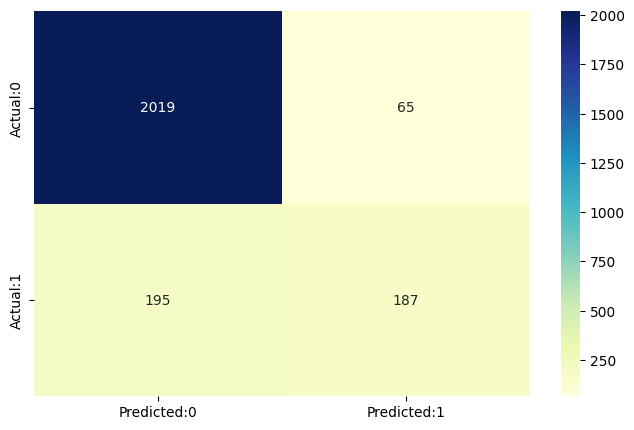

In [61]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu");

In [62]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)

In [63]:
print('Độ chính xác của mô hình = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'Tỷ lệ sai sót = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Độ nhạy/tỷ lệ True Positive = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Độ đặc hiệu/tỷ lệ True Negative = TN/(TN+FP) =       ',TN/float(TN+FP),'\n',

'Giá trị dự đoán Positive = TP/(TP+FP) =               ',TP/float(TP+FP),'\n',

'Giá trị dự đoán Negative = TN/(TN+FN) =               ',TN/float(TN+FN),'\n',

'Tỷ số khả năng Positive = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Tỷ số khả năng Negative = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

Độ chính xác của mô hình = TP+TN/(TP+TN+FP+FN) =        0.894566098945661 
 Tỷ lệ sai sót = 1-Accuracy =                   0.10543390105433903 
 Độ nhạy/tỷ lệ True Positive = TP/(TP+FN) =        0.4895287958115183 
 Độ đặc hiệu/tỷ lệ True Negative = TN/(TN+FP) =        0.968809980806142 
 Giá trị dự đoán Positive = TP/(TP+FP) =                0.7420634920634921 
 Giá trị dự đoán Negative = TN/(TN+FN) =                0.9119241192411924 
 Tỷ số khả năng Positive = Sensitivity/(1-Specificity) =  15.695046314941585 
 Tỷ số khả năng Negative = (1-Sensitivity)/Specificity =  0.5269053935259018


In [64]:
y_pred_prob = rfc.predict_proba(X_test)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of Not Fraud (0)', 'Prob of Fraud (1)'])
y_pred_prob_df.head()

,Prob of Not Fraud (0),Prob of Fraud (1)
0,0.97,0.03
1,0.85,0.15
2,0.26,0.74
3,0.99,0.01
4,0.99,0.01


In [65]:
for i in range(0, 11):
    cm2 = 0
    threshold = i/10
    y_pred_prob_yes = rfc.predict_proba(X_test)
    y_pred2 = binarize(y_pred_prob_yes, threshold=threshold)[:, 1]
    cm2 = confusion_matrix(y_test, y_pred2)
    print('With', threshold, 'threshold the Confusion Matrix is', '\n', cm2, '\n',
          'with', cm2[0, 0] + cm2[1, 1], 'correct predictions and', cm2[1, 0], 'Type II errors (False Negatives)', '\n\n',
          'Sensitivity:', cm2[1, 1]/(float(cm2[1, 1] + cm2[1, 0])),
          'Specificity:', cm2[0, 0]/(float(cm2[0, 0] + cm2[0, 1])), '\n\n\n')

With 0.0 threshold the Confusion Matrix is 
 [[ 534 1550]
 [  15  367]] 
 with 901 correct predictions and 15 Type II errors (False Negatives) 

 Sensitivity: 0.9607329842931938 Specificity: 0.2562380038387716 



With 0.1 threshold the Confusion Matrix is 
 [[1614  470]
 [  51  331]] 
 with 1945 correct predictions and 51 Type II errors (False Negatives) 

 Sensitivity: 0.8664921465968587 Specificity: 0.77447216890595 



With 0.2 threshold the Confusion Matrix is 
 [[1821  263]
 [  76  306]] 
 with 2127 correct predictions and 76 Type II errors (False Negatives) 

 Sensitivity: 0.8010471204188482 Specificity: 0.8738003838771593 



With 0.3 threshold the Confusion Matrix is 
 [[1881  203]
 [ 105  277]] 
 with 2158 correct predictions and 105 Type II errors (False Negatives) 

 Sensitivity: 0.725130890052356 Specificity: 0.9025911708253359 



With 0.4 threshold the Confusion Matrix is 
 [[1950  134]
 [ 142  240]] 
 with 2190 correct predictions and 142 Type II errors (False Negatives

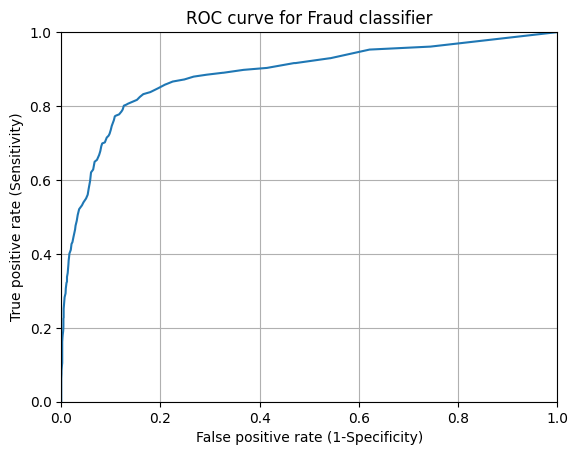

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [67]:
roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.8848707680557928

> Tìm siêu tham số cho mô hình RF

In [68]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [69]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)


In [70]:
model_grid = RandomForestClassifier(max_depth=9,
                                    max_features=None,
                                    max_leaf_nodes=9,
                                    n_estimators=25)
model_grid.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

       False       0.92      0.92      0.92      2085
        True       0.54      0.54      0.54       381

    accuracy                           0.86      2466
   macro avg       0.73      0.73      0.73      2466
weighted avg       0.86      0.86      0.86      2466



In [71]:
print('AUC = ', roc_auc_score(y_test, y_pred))
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('F1-score = ', f1_score(y_test, y_pred))
print('LogLoss = ', log_loss(y_test, y_pred))

AUC =  0.7291693883088303
Accuracy =  0.894566098945661
F1-score =  0.5899053627760252
LogLoss =  3.800222985065069


**Đánh giá tổng quát:**

## Tổng kết